<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/Chess_Piece_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
drive.mount('/content/gdrive')
chess_dataset_url = 'gdrive/My Drive/AI/Chess Piece Dataset'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
chess_path = pathlib.Path(chess_dataset_url)
chess_path

PosixPath('gdrive/My Drive/AI/Chess Piece Dataset')

In [ ]:
len(list(chess_path.glob('*/*.jpg')))

651

In [ ]:
rook = list(chess_path.glob('Rook-resize/*'))
rook[:5]

[PosixPath('gdrive/My Drive/AI/Chess Piece Dataset/Rook-resize/00000047_resized.jpg'),
 PosixPath('gdrive/My Drive/AI/Chess Piece Dataset/Rook-resize/00000045_resized.jpg'),
 PosixPath('gdrive/My Drive/AI/Chess Piece Dataset/Rook-resize/00000035_resized.jpg'),
 PosixPath('gdrive/My Drive/AI/Chess Piece Dataset/Rook-resize/00000036_resized.jpg'),
 PosixPath('gdrive/My Drive/AI/Chess Piece Dataset/Rook-resize/00000037_resized.jpg')]

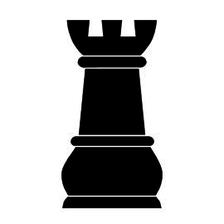

In [ ]:
PIL.Image.open(str(rook[0]))

In [ ]:
chess_img_dict = {
    'rook' : list(chess_path.glob('Rook-resize/*')),
    'queen' : list(chess_path.glob('Queen-Resized/*')),
    'pawn' : list(chess_path.glob('pawn_resized/*')),
    'knight' : list(chess_path.glob('knight-resize/*')),
    'bishop' : list(chess_path.glob('bishop_resized/*')),
}

In [ ]:
chess_label_dict = {
    'rook' : 0,
    'queen' : 1,
    'pawn' : 2,
    'knight' : 3,
    'bishop' : 4
}

In [ ]:
cv2.imread(str(chess_img_dict['rook'][0]))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
X , Y = [] , []
for chess_piece , images in chess_img_dict.items():
  for image in images:
    X.append(cv2.imread(str(image)))
    Y.append(chess_label_dict[chess_piece])

In [ ]:
X = np.array(x_train)
Y = np.array(y_train)

In [ ]:
print(X.shape)
print(Y.shape)

(651, 224, 224, 3)
(651,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.1)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
data_augmentation = keras.Sequential([
                                      keras.layers.RandomFlip(input_shape=(224,224,3)),
                                      keras.layers.RandomZoom(0.1),
                                      keras.layers.RandomRotation(0.1),

])

In [ ]:
model = keras.Sequential([
                          data_augmentation,
                          keras.layers.Conv2D(16,3,activation='relu'),
                          keras.layers.MaxPool2D(),
                          keras.layers.Conv2D(32,3,activation='relu'),
                          keras.layers.MaxPool2D(),
                          keras.layers.Conv2D(64,3,activation='relu'),
                          keras.layers.MaxPool2D(),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu',kernel_regularizer='l2'),
                          keras.layers.Dense(5,activation='softmax')

])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test) , epochs=30)

Epoch 1/30
19/19 [==============================] - 33s 2s/step - loss: 3.1787 - accuracy: 0.2308 - val_loss: 2.2816 - val_accuracy: 0.2424
Epoch 2/30
19/19 [==============================] - 30s 2s/step - loss: 2.1032 - accuracy: 0.2359 - val_loss: 2.0240 - val_accuracy: 0.1970
Epoch 3/30
19/19 [==============================] - 30s 2s/step - loss: 1.9029 - accuracy: 0.2735 - val_loss: 2.0859 - val_accuracy: 0.1970
Epoch 4/30
19/19 [==============================] - 30s 2s/step - loss: 1.7987 - accuracy: 0.2957 - val_loss: 1.8972 - val_accuracy: 0.1667
Epoch 5/30
19/19 [==============================] - 30s 2s/step - loss: 1.7394 - accuracy: 0.2803 - val_loss: 1.8844 - val_accuracy: 0.3182
Epoch 6/30
19/19 [==============================] - 30s 2s/step - loss: 1.7013 - accuracy: 0.3197 - val_loss: 1.7467 - val_accuracy: 0.2727
Epoch 7/30
19/19 [==============================] - 30s 2s/step - loss: 1.6875 - accuracy: 0.3128 - val_loss: 1.7430 - val_accuracy: 0.3636
Epoch 8/30
19/19 [==

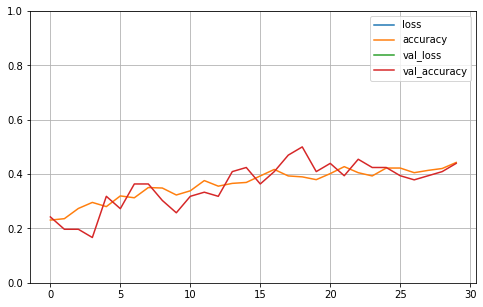

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)       